<a href="https://colab.research.google.com/github/Muhammad-Ahmad-Faizan/CodSoft-Internship-Repository/blob/main/Supervised(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [9]:
cols=["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]
df=pd.read_csv("SeoulBikeData.csv", encoding='latin1').drop(['Date','Holiday','Seasons'], axis=1)

In [10]:
df.columns=cols
df["functional"]=(df["functional"]=="Yes").astype(int)
df=df[df["hour"]==12]
df=df.drop(["hour"],axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


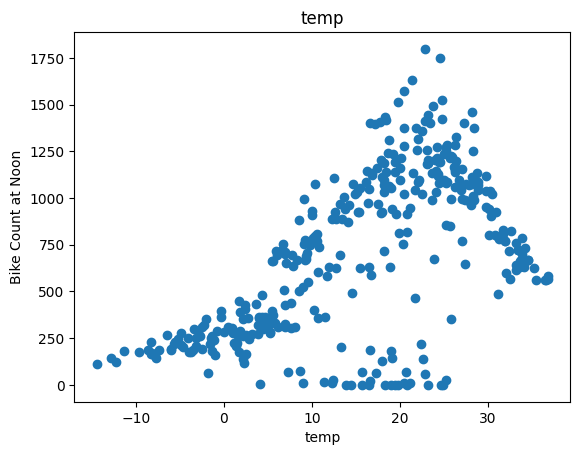

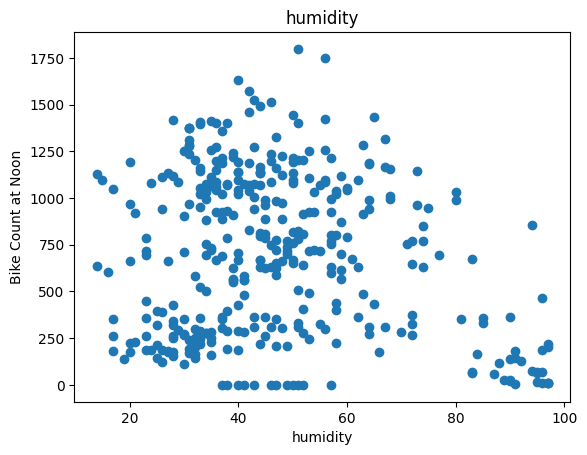

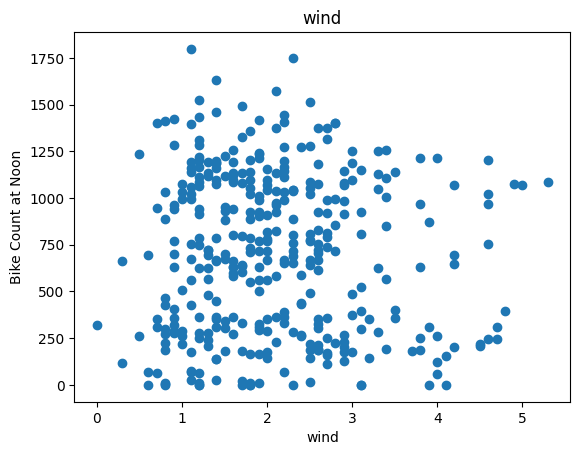

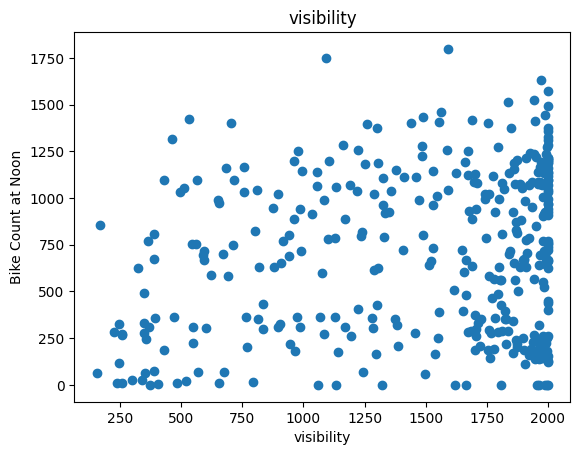

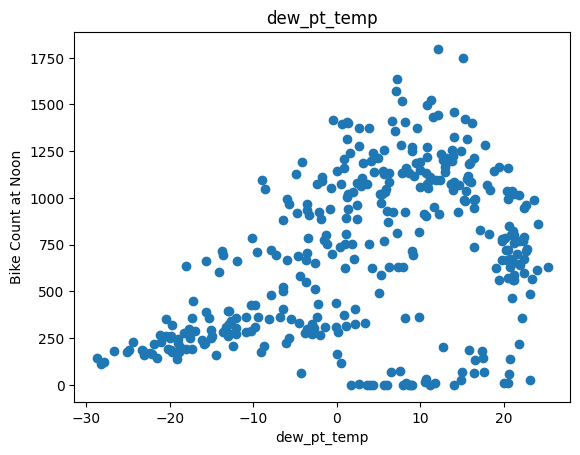

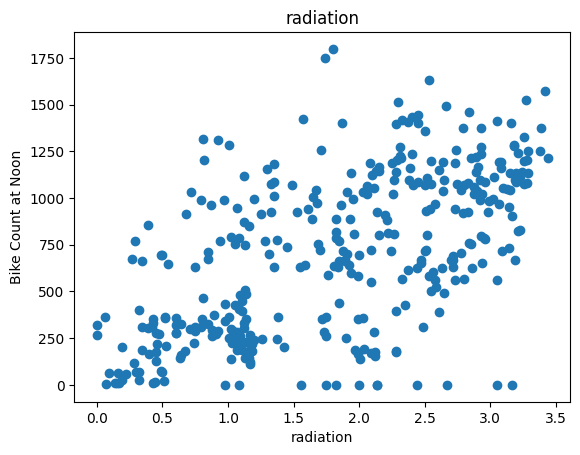

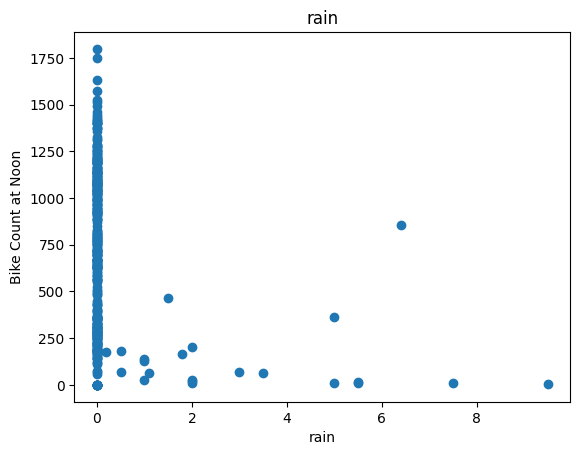

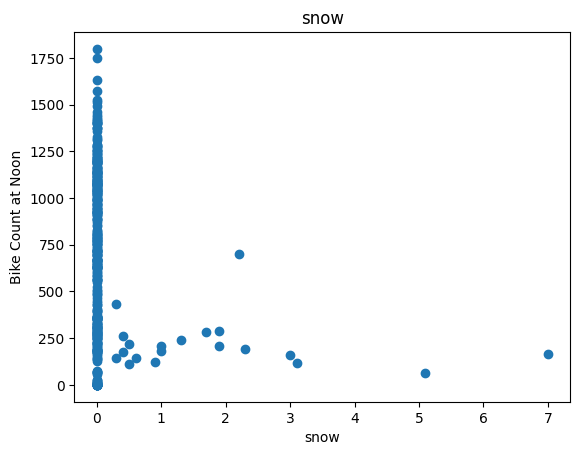

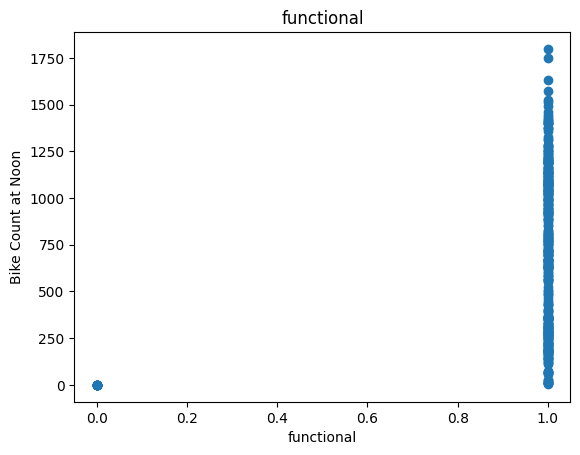

In [11]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [12]:
df=df.drop(["wind",'visibility', 'functional'], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train / Validation / Test Dataset

In [13]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [14]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe=copy.deepcopy(dataframe)
  if x_labels is None:
    X=dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values

  y=dataframe[y_label].values.reshape(-1,1)
  data=np.hstack((X,y))
  return data, X,y

In [15]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_valid_temp, y_valid_temp = get_xy(valid, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

# Simple Linear Regression

In [16]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [17]:
temp_reg.score(X_test_temp, y_test_temp)

0.2525320214061916

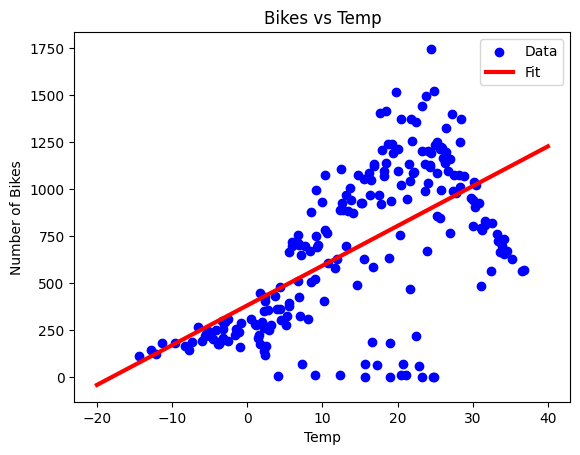

In [18]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

# Multiple Linear Regression

In [19]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels = df.columns[1:])
_, X_valid_all, y_valid_all = get_xy(valid, "bike_count", x_labels = df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels = df.columns[1:])

In [20]:
all_reg=LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [21]:
all_reg.score(X_train_all, y_train_all)

0.46080817148957265

In [22]:
y_pred_lr = all_reg.predict(X_test_all)

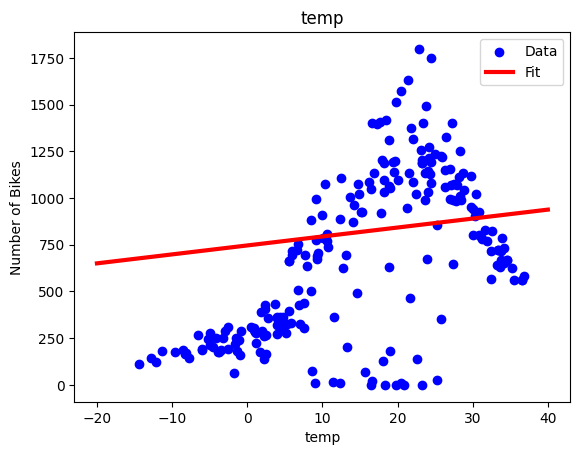

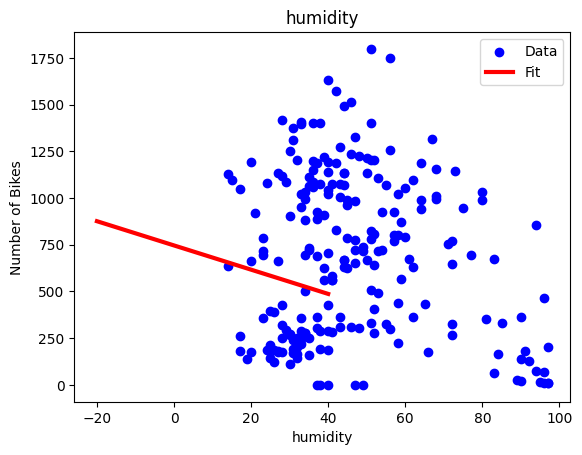

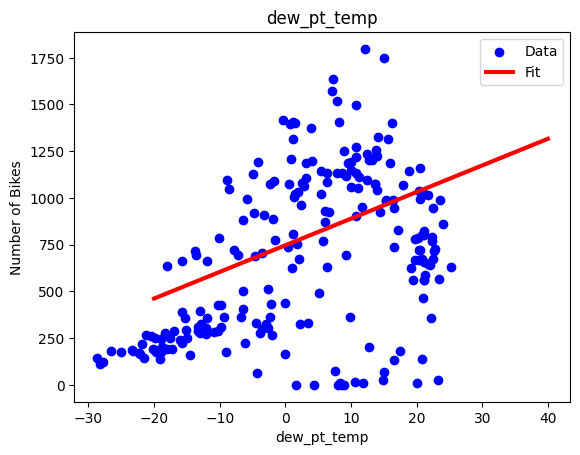

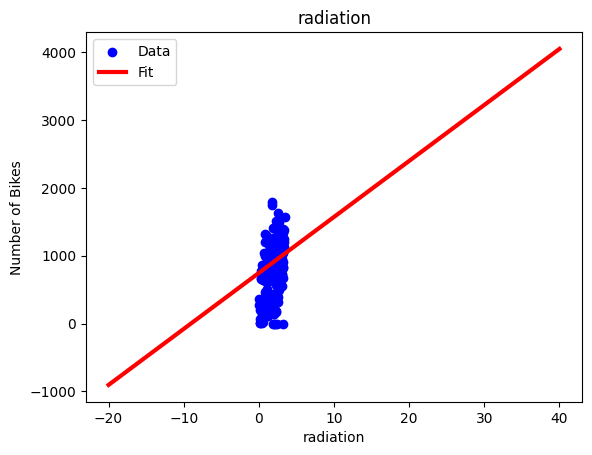

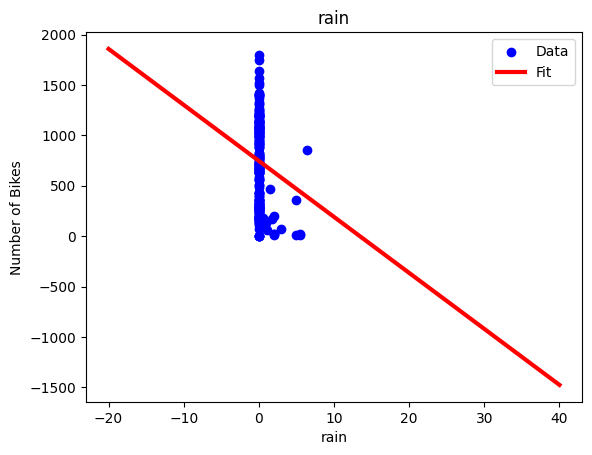

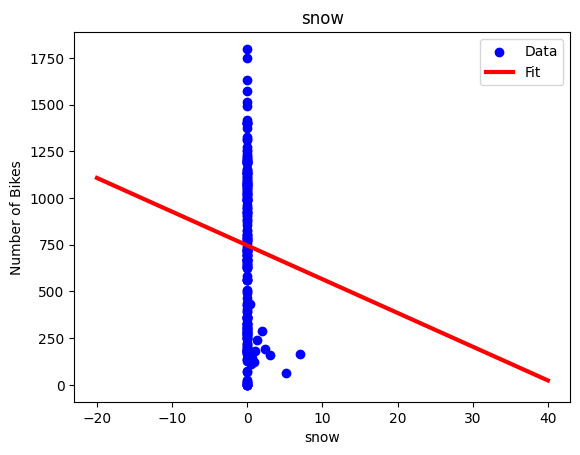

In [23]:
for label in df.columns[1:]:

  X_train_label = X_train_all[:, df.columns.get_loc(label)-1]
  plt.scatter(X_train_label, y_train_all, label="Data", color="blue")
  x = tf.linspace(-20,40,100)
  x_dummy = np.zeros((x.shape[0], X_train_all.shape[1]))
  x_dummy[:, df.columns.get_loc(label)-1] = x
  plt.plot(x,all_reg.predict(x_dummy), label="Fit", color="red", linewidth=3)
  plt.legend()
  plt.title(label)
  plt.ylabel("Number of Bikes")
  plt.xlabel(label)
  plt.show()

# Neural Networks (Regression)

In [37]:
def plot_loss(history):
  plt.plot(history.history['loss'], label ='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel("Epoch")
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [38]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [39]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [40]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

In [41]:
history = temp_nn_model.fit(X_train_temp.reshape(-1),
                            y_train_temp,
                            verbose=0,
                            epochs=1000,
                            validation_data=(X_valid_temp, y_valid_temp))

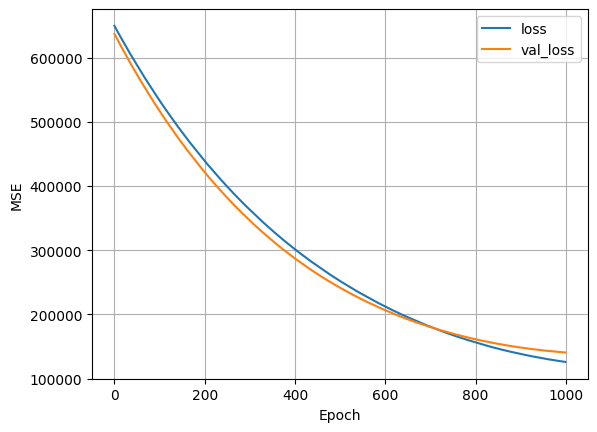

In [42]:
plot_loss(history)

4/4 [==============================] - 0s 4ms/step


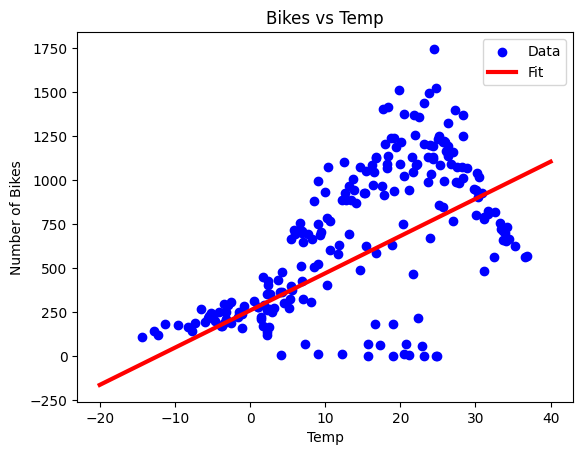

In [43]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

Neural Net

In [45]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

In [46]:
history = nn_model.fit(X_train_temp,
                            y_train_temp,
                            verbose=0,
                            epochs=100,
                            validation_data=(X_valid_temp, y_valid_temp))

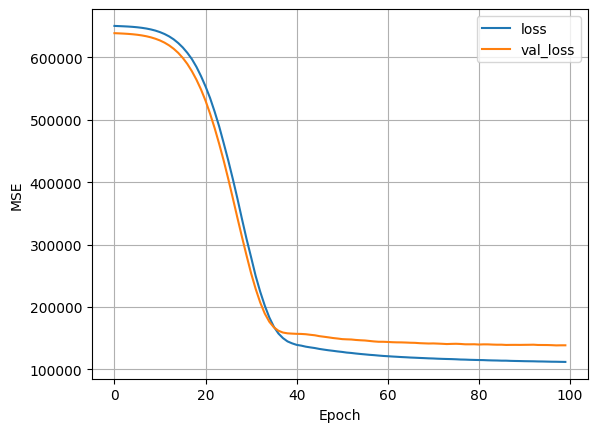

In [47]:
plot_loss(history)

4/4 [==============================] - 0s 4ms/step


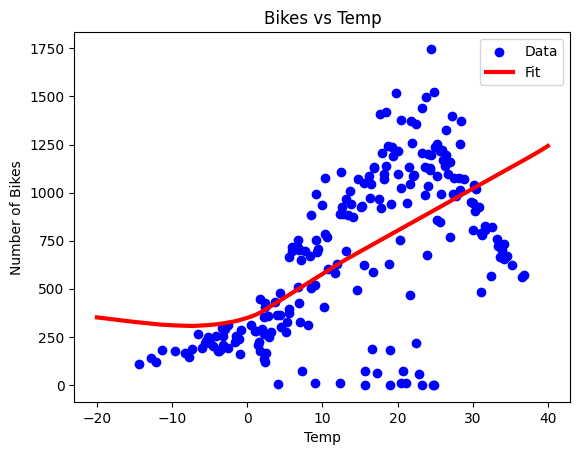

In [48]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

In [49]:
all_normalizer=tf.keras.layers.Normalization(input_shape=(6,), axis=1)
all_normalizer.adapt(X_train_all)

nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss="mean_squared_error")

In [52]:
history= nn_model.fit(
    X_train_all,
    y_train_all,
    verbose=0,
    epochs=100,
    validation_data=(X_valid_all, y_valid_all)
)

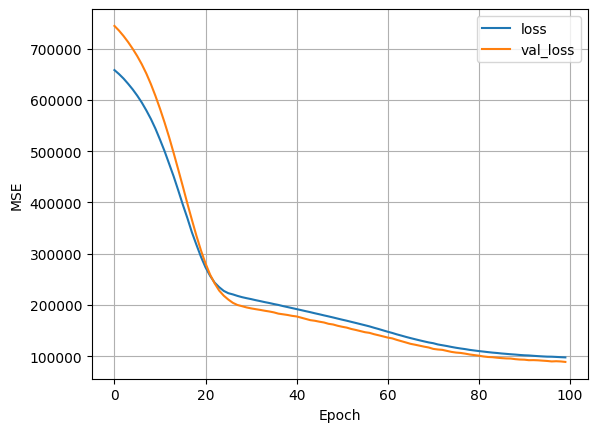

In [53]:
plot_loss(history)

In [54]:
#Calculating MSE for both Linear Regression & NN_Model
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 5ms/step


In [56]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [57]:
MSE(y_pred_lr, y_test_all)

99391.71069972306

In [58]:
MSE(y_pred_nn, y_test_all)

103828.60486138027

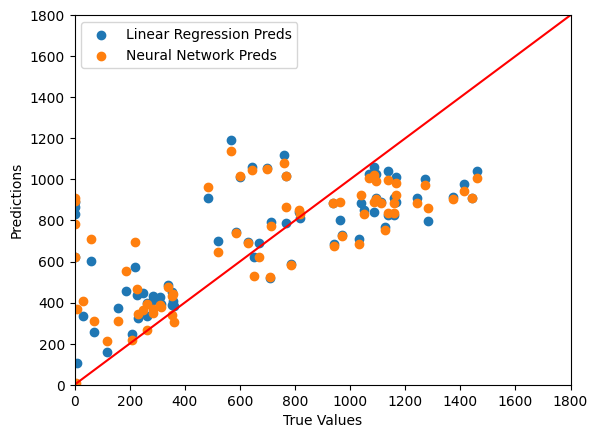

In [64]:

plt.scatter(y_test_all, y_pred_lr, label="Linear Regression Preds")
plt.scatter(y_test_all, y_pred_nn, label="Neural Network Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims=[0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")